In [3]:
import pandas as pd
import numpy as np
from itertools import chain
import ast
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

Đọc dữ liệu từ file:

In [4]:
item_df = pd.read_csv('process_data_tft_each_item_csv.csv', usecols=[
                      'ID Match', 'Champion', 'List Name Item']).drop_duplicates().reset_index(drop=True)
item_df = item_df[['Champion', 'List Name Item']]
item_df

,Champion,List Name Item
0,"['TFT8_Gangplank', 'TFT8_Vi', 'TFT8_LeeSin', '...","[['TFT_Item_ZekesHerald'], ['TFT_Item_BrambleV..."
1,"['TFT8_Lux', 'TFT8_Annie', 'TFT8_Yuumi', 'TFT8...","[['TFT8_Item_HeartEmblemItem'], ['TFT_Item_Bra..."
2,"['TFT8_Galio', 'TFT8_Nasus', 'TFT8_Gangplank',...","[['TFT_Item_GargoyleStoneplate'], [], ['TFT_It..."
3,"['TFT8_Fiora', 'TFT8_Yasuo', 'TFT8_Vayne', 'TF...","[[], ['TFT8_Item_HackerEmblemItem'], ['TFT_Ite..."
4,"['TFT8_Lulu', 'TFT8_Annie', 'TFT8_Yuumi', 'TFT...","[[], ['TFT_Item_WarmogsArmor', 'TFT_Item_Titan..."
...,...,...
18091,"['TFT8_Blitzcrank', 'TFT8_Renekton', 'TFT8_Vi'...","[[], ['TFT_Item_ArchangelsStaff', 'TFT_Item_Je..."
18092,"['TFT8_Fiora', 'TFT8_Yasuo', 'TFT8_Vayne', 'TF...","[['TFT_Item_TitanicHydra'], ['TFT_Item_ChainVe..."
18093,"['TFT8_WuKong', 'TFT8_Jax', 'TFT8_Zoe', 'TFT8_...","[[], [], ['TFT8_Item_HeartEmblemItem'], ['TFT_..."
18094,"['TFT8_Kayle', 'TFT8_Gangplank', 'TFT8_Fiora',...","[[], [], [], [], ['TFT_Item_StatikkShiv', 'TFT..."


Đổi kiểu dữ liệu từ String sang List

In [5]:
def changeStringToList(col_name, df):
    for i in range(len(col_name)):
        temp = []
        for j in range(len(df[col_name[i]])):
            temp.append(ast.literal_eval(df[col_name[i]][j]))
        df[col_name[i]] = temp

In [6]:
col_name_type_list = ['Champion', 'List Name Item']
changeStringToList(col_name_type_list, item_df)

Tạo dataframe với mỗi tướng sẽ là trang bị gì:

In [7]:
list_champion = list(chain.from_iterable(item_df['Champion']))
list_item_of_champion = list(chain.from_iterable((item_df['List Name Item'])))

champion_df = pd.DataFrame(data=list_champion, columns=['Champion'])
item_of_champions_df = pd.DataFrame(data= list_item_of_champion, columns=['First', 'Second', 'Third', '0', '1', '2', '3']).iloc[:,:-4]

extracted_col = champion_df['Champion']

item_of_champions_df.insert(0, "Champion", extracted_col)
pos = ['First', 'Second', 'Third']
list_champion_unique = sorted(champion_df['Champion'].unique())


Với mỗi tướng sẽ tạo ra tập các trang bị được sử dụng với tỉ lệ là bao nhiêu:

In [8]:
list_item_unique = list(set(i for j in list_item_of_champion for i in j))
list_item_unique
data_model = pd.DataFrame(columns=list_champion_unique, index=list_item_unique)
for champ in list_champion_unique:
    first_item = item_of_champions_df[['Champion','First']].value_counts()[champ]
    second_item = item_of_champions_df[['Champion','Second']].value_counts()[champ]
    third_item = item_of_champions_df[['Champion','Third']].value_counts()[champ]  
    freq = first_item.add(second_item.add(third_item, fill_value=0), fill_value=0).sort_values(ascending=False) / first_item.add(second_item.add(third_item, fill_value=0), fill_value=0).sort_values(ascending=False).sum()
    data_model[champ] = freq

Chuyển đổi giá trị Nan thành 0 (ứng với những trang bị không được lên)

In [9]:
data_model = data_model.fillna(0).T
data_model

,TFT8_Item_PranksterEmblemItem,TFT5_Item_RabadonsDeathcapRadiant,TFT_Item_GargoyleStoneplate,TFT5_Item_GuardianAngelRadiant,TFT_Item_BrambleVest,TFT5_Item_DragonsClawRadiant,TFT8_Item_StarGuardianEmblemItem,TFT5_Item_ShroudOfStillnessRadiant,TFT_Item_MadredsBloodrazor,TFT8_Item_ADMINEmblemItem,...,TFT_Item_Spatula,TFT_Item_Deathblade,TFT8_Item_DefenderEmblemItem,TFT_Item_ZekesHerald,TFT_Item_Redemption,TFT5_Item_IonicSparkRadiant,TFT5_Item_SunfireCapeRadiant,TFT8_Item_HackerEmblemItem,TFT4_Item_OrnnZhonyasParadox,TFT8_Item_ExoPrimeEmblemItem
TFT8_Alistar,0.019990,0.000000,0.054260,0.000000,0.028320,0.000238,0.004998,0.000476,0.004998,0.006188,...,0.001190,0.003570,0.002142,0.008567,0.047596,0.000238,0.000238,0.001190,0.000238,0.001666
TFT8_Annie,0.004873,0.000000,0.149033,0.000000,0.076403,0.000314,0.003144,0.000000,0.000943,0.002830,...,0.000314,0.000629,0.000943,0.001100,0.038516,0.001258,0.001100,0.000786,0.001258,0.000000
TFT8_Aphelios,0.001090,0.000000,0.001090,0.000545,0.000817,0.000000,0.000000,0.000000,0.106812,0.001090,...,0.000817,0.050409,0.000000,0.022343,0.002180,0.000000,0.000000,0.001090,0.000817,0.000272
TFT8_Ashe,0.000909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150909,0.000000,...,0.000000,0.120909,0.000000,0.006364,0.000909,0.000000,0.000000,0.000000,0.000000,0.000000
TFT8_AurelionSol,0.000825,0.000413,0.000000,0.000000,0.000413,0.000000,0.002888,0.000000,0.101898,0.002888,...,0.000000,0.000825,0.000413,0.006188,0.002475,0.000000,0.000000,0.000825,0.003713,0.000413
TFT8_BelVeth,0.000889,0.000000,0.001334,0.002223,0.000889,0.000000,0.000000,0.000000,0.088484,0.001779,...,0.000445,0.041352,0.000000,0.007559,0.000889,0.000445,0.000000,0.001334,0.000445,0.000445
TFT8_Blitzcrank,0.000000,0.000000,0.090652,0.000000,0.054769,0.000000,0.000944,0.000000,0.001889,0.000000,...,0.001889,0.000944,0.003777,0.016053,0.100094,0.000000,0.001889,0.002833,0.000000,0.040604
TFT8_Camille,0.000000,0.000000,0.000568,0.000000,0.005108,0.000000,0.000000,0.000000,0.048241,0.000000,...,0.000000,0.030079,0.000000,0.002838,0.003405,0.000568,0.000000,0.004540,0.000568,0.000568
TFT8_Chogath,0.002434,0.000000,0.055015,0.000000,0.048685,0.000487,0.001461,0.000000,0.009250,0.002434,...,0.000974,0.007303,0.001947,0.006329,0.060370,0.000000,0.000000,0.002434,0.000000,0.000000
TFT8_Draven,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095946,0.001351,...,0.000000,0.017568,0.001351,0.001351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# print(data_model.loc['TFT8_Lux'].sort_values(ascending=False)[:10])

Lưu dữ liệu vào file csv

In [11]:
data_model.to_csv('data_model_csv.csv')

Sử dụng dữ liệu được tạo ra phía trên để thực hiện gom cụm bằng thuật toán của thư viện sklearn:

In [12]:
clustering = AgglomerativeClustering(n_clusters=4).fit(data_model)
clustering.labels_

array([3, 3, 0, 0, 1, 0, 3, 0, 3, 0, 3, 1, 2, 2, 3, 2, 2, 0, 2, 2, 0, 2,
       2, 3, 1, 2, 3, 1, 2, 2, 3, 2, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 1, 1,
       3, 2, 1, 2, 2, 0, 1, 3, 2, 2, 2, 1, 3, 0, 1], dtype=int64)

Sau khi gom cụm xong ta phân được 4 nhóm khác nhau, bây giờ ta gắn nó với tên nhóm tương ứng:

In [13]:
champ_type = ['dame', 'magic','utility','tank']
for i in range(len(data_model.index)):
    print(data_model.index[i], ': ', champ_type[clustering.labels_[i]])

TFT8_Alistar :  tank
TFT8_Annie :  tank
TFT8_Aphelios :  dame
TFT8_Ashe :  dame
TFT8_AurelionSol :  magic
TFT8_BelVeth :  dame
TFT8_Blitzcrank :  tank
TFT8_Camille :  dame
TFT8_Chogath :  tank
TFT8_Draven :  dame
TFT8_Ekko :  tank
TFT8_Ezreal :  magic
TFT8_Fiddlesticks :  utility
TFT8_Fiora :  utility
TFT8_Galio :  tank
TFT8_Gangplank :  utility
TFT8_Janna :  utility
TFT8_Jax :  dame
TFT8_Jinx :  utility
TFT8_Kaisa :  utility
TFT8_Kayle :  dame
TFT8_Leblanc :  utility
TFT8_LeeSin :  utility
TFT8_Leona :  tank
TFT8_Lulu :  magic
TFT8_Lux :  utility
TFT8_Malphite :  tank
TFT8_MissFortune :  magic
TFT8_Mordekaiser :  utility
TFT8_Nasus :  utility
TFT8_Nilah :  tank
TFT8_Nunu :  utility
TFT8_Poppy :  tank
TFT8_Rammus :  tank
TFT8_Rell :  tank
TFT8_Renekton :  tank
TFT8_Riven :  tank
TFT8_Samira :  dame
TFT8_Sejuani :  tank
TFT8_Senna :  dame
TFT8_Sett :  tank
TFT8_Sivir :  dame
TFT8_Sona :  magic
TFT8_Soraka :  magic
TFT8_Sylas :  tank
TFT8_Syndra :  utility
TFT8_Taliyah :  magic
TFT8_Talo

Dendrogram của việc gom cụm:

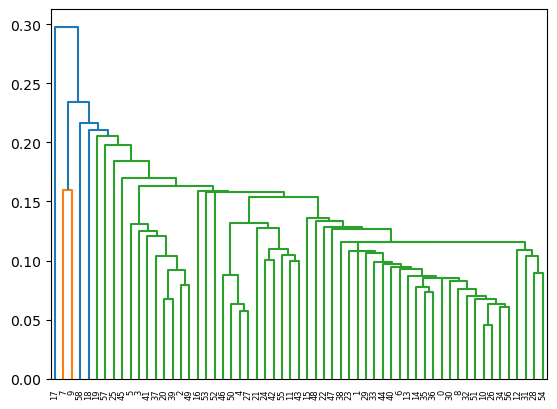

In [17]:
dendro = sch.dendrogram(sch.linkage(data_model))